# Bitcoin prediction using RNN and LSTM

## Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Importing the dataset

In [2]:
dataset = pd.read_csv('BTC-USD.csv', date_parser = True)
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN
2079,2020-05-27,8834.157227,8859.578125,8834.157227,8856.885742,8856.885742,2.914432e+10


## Splitting the dataset into testing and training data

In [3]:
dataset_training = dataset[dataset['Date']< '2020-01-10'].copy()
dataset_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
1937,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,2.327626e+10
1938,2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,8163.692383,2.876729e+10
1939,2020-01-08,8161.935547,8396.738281,7956.774414,8079.862793,8079.862793,3.167256e+10


In [4]:
dataset_test = dataset[dataset['Date']> '2020-01-10'].copy()
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
1942,2020-01-11,8162.190918,8218.359375,8029.642090,8037.537598,8037.537598,2.552117e+10
1943,2020-01-12,8033.261719,8200.063477,8009.059082,8192.494141,8192.494141,2.290344e+10
1944,2020-01-13,8189.771973,8197.788086,8079.700684,8144.194336,8144.194336,2.248291e+10
1945,2020-01-14,8140.933105,8879.511719,8140.933105,8827.764648,8827.764648,4.484178e+10
1946,2020-01-15,8825.343750,8890.117188,8657.187500,8807.010742,8807.010742,4.010283e+10
...,...,...,...,...,...,...,...
2075,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2076,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2077,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2078,2020-05-26,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping the unnecessary columns

In [5]:
training_dataset = dataset_training.drop(['Date', 'Adj Close'], axis = 1)
training_dataset.head()

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800.0
1,456.859985,456.859985,413.104004,424.440002,34483200.0
2,424.102997,427.834991,384.532013,394.795990,37919700.0
3,394.673004,423.295990,389.882996,408.903992,36863600.0
4,408.084991,412.425995,393.181000,398.821014,26580100.0


## Preprocessing and fitting the training data

In [6]:
scaler = MinMaxScaler()
training_dataset = scaler.fit_transform(training_dataset)
training_dataset

array([[1.49732345e-02, 1.29013200e-02, 1.49400698e-02, 1.44534769e-02,
        3.35749244e-04],
       [1.45066780e-02, 1.23321258e-02, 1.28489753e-02, 1.27508263e-02,
        6.33453324e-04],
       [1.28093283e-02, 1.08719155e-02, 1.13293978e-02, 1.12164013e-02,
        7.09650970e-04],
       ...,
       [3.93379086e-01, 4.00783670e-01, 4.04025068e-01, 4.13347816e-01,
        6.37727105e-01],
       [4.13756068e-01, 4.11777256e-01, 4.14052776e-01, 4.09008653e-01,
        7.02145722e-01],
       [4.09629427e-01, 3.95958061e-01, 4.07970071e-01, 3.98615340e-01,
        5.33041521e-01]])

In [7]:
X_train = []
Y_train = []
training_dataset.shape[0]

1941

In [8]:
for i in range(60, training_dataset.shape[0]):
    X_train.append(training_dataset[i-60:i])
    Y_train.append(training_dataset[i,0])

In [9]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [10]:
X_train.shape

(1881, 60, 5)

# Building LSTM model

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

## Applying LSRM

In [12]:
reg = Sequential()
reg.add(LSTM(units = 60, activation = 'tanh', return_sequences = True, input_shape = (X_train.shape[1], 5)))
reg.add(Dropout(0.2))

In [13]:
reg.add(LSTM(units = 70, activation = 'sigmoid', return_sequences = True))
reg.add(Dropout(0.4))

reg.add(LSTM(units = 90, activation = 'sigmoid', return_sequences = True))
reg.add(Dropout(0.5))

reg.add(LSTM(units = 120, activation = 'sigmoid'))
reg.add(Dropout(0.6))

reg.add(Dense(units =1))

In [14]:
reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 70)            36680     
                                                                 
 dropout_1 (Dropout)         (None, 60, 70)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 90)            57960     
                                                                 
 dropout_2 (Dropout)         (None, 60, 90)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               1

In [15]:
reg.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the data

In [16]:
reg.fit(X_train, Y_train, epochs = 100, batch_size =50)

Epoch 1/100
38/38 [==============================] - 11s 156ms/step - loss: 0.2256
Epoch 2/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0912
Epoch 3/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0607
Epoch 4/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0361
Epoch 5/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0285
Epoch 6/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0244
Epoch 7/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0215
Epoch 8/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0194
Epoch 9/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0184
Epoch 10/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0195
Epoch 11/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0317
Epoch 12/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0393
Epoch 13/100

 # Test Dataset

In [17]:
last_60_days = dataset_training.tail(60)
dataframe= last_60_days.append(dataset_test, ignore_index = True)
dataframe = dataframe.drop(['Date', 'Adj Close'], axis = 1)
dataframe.head()

,Open,High,Low,Close,Volume
0,9056.917969,9081.279297,8700.608398,8757.788086,2.026551e+10
1,8759.751953,8853.768555,8685.427734,8815.662109,2.030977e+10
2,8812.033203,8836.841797,8761.651367,8808.262695,1.754576e+10
3,8811.936523,8826.943359,8692.551758,8708.094727,1.908474e+10
4,8705.708008,8730.873047,8484.843750,8491.992188,2.179686e+10


In [18]:
inputs = scaler.transform(dataframe)
inputs

array([[0.46013085, 0.44621564, 0.45361296, 0.44409923, 0.4492168 ],
       [0.44473277, 0.43476986, 0.45280559, 0.44709489, 0.45019814],
       [0.4474418 , 0.4339183 , 0.45685948, 0.44671188, 0.38891156],
       [0.44743679, 0.43342032, 0.45318448, 0.44152702, 0.42303552],
       [0.44193241, 0.42858715, 0.4421377 , 0.43034118, 0.48317139],
       [0.43081561, 0.42160048, 0.44155958, 0.43338314, 0.36562176],
       [0.43383675, 0.428432  , 0.44299524, 0.43479183, 0.4138093 ],
       [0.43510676, 0.42468356, 0.43090146, 0.420884  , 0.47835128],
       [0.42117614, 0.41236981, 0.42166816, 0.41554526, 0.46735663],
       [0.41591566, 0.40375311, 0.41691075, 0.40628626, 0.46027648],
       [0.40659032, 0.39735676, 0.39493878, 0.38638294, 0.49907803],
       [0.38689619, 0.37659358, 0.35980132, 0.36846447, 0.75912503],
       [0.36889492, 0.36375861, 0.37122057, 0.37370375, 0.46570054],
       [0.37420451, 0.36206413, 0.36472524, 0.35559337, 0.6746724 ],
       [0.3556202 , 0.35760073, 0.

In [19]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [20]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((138, 60, 5), (138,))

## Prediction values

In [21]:
Y_pred = reg.predict(X_test)
Y_pred, Y_test

(array([[0.3867746 ],
        [0.38489515],
        [0.38076973],
        [0.37828046],
        [0.39115047],
        [0.4096342 ],
        [0.41802973],
        [0.41991627],
        [0.41824603],
        [0.41608593],
        [0.4102267 ],
        [0.40432775],
        [0.40229106],
        [0.40333667],
        [0.4030208 ],
        [0.39885464],
        [0.39622873],
        [0.40205702],
        [0.41726926],
        [0.4320856 ],
        [0.4415657 ],
        [0.44262457],
        [0.43716756],
        [0.43380556],
        [0.43438464],
        [0.4351578 ],
        [0.43980405],
        [0.44908276],
        [0.45673582],
        [0.46058556],
        [0.46343544],
        [0.46658435],
        [0.46803668],
        [0.47378922],
        [0.48294356],
        [0.48545998],
        [0.48067626],
        [0.47209546],
        [0.46492824],
        [0.464135  ],
        [0.46674892],
        [0.4651938 ],
        [0.4595416 ],
        [0.4529931 ],
        [0.45392206],
        [0

In [22]:
scaler.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       2.21730382e-11])

In [23]:
scale = 1/6.1912345e-05
scale

19298.903787912797

In [24]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [25]:
Y_pred


array([[7464.326 ],
       [7428.0547],
       [7348.4385],
       [7300.3984],
       [7548.7754],
       [7905.491 ],
       [8067.5156],
       [8103.924 ],
       [8071.69  ],
       [8030.0024],
       [7916.926 ],
       [7803.0825],
       [7763.777 ],
       [7783.956 ],
       [7777.86  ],
       [7697.4575],
       [7646.7803],
       [7759.26  ],
       [8052.8394],
       [8338.778 ],
       [8521.734 ],
       [8542.169 ],
       [8436.8545],
       [8371.972 ],
       [8383.147 ],
       [8398.068 ],
       [8487.736 ],
       [8666.806 ],
       [8814.501 ],
       [8888.797 ],
       [8943.796 ],
       [9004.566 ],
       [9032.595 ],
       [9143.612 ],
       [9320.281 ],
       [9368.846 ],
       [9276.525 ],
       [9110.925 ],
       [8972.605 ],
       [8957.297 ],
       [9007.743 ],
       [8977.73  ],
       [8868.649 ],
       [8742.2705],
       [8760.198 ],
       [8881.704 ],
       [8886.121 ],
       [8740.106 ],
       [8440.661 ],
       [8157.0854],


In [26]:
Y_test

array([ 7985.2939191 ,  7856.36472004,  8012.87497412,  7964.03610609,
        8648.44675144,  8635.58444644,  8548.31296239,  8750.31491549,
        8764.5483145 ,  8527.73483738,  8482.09421236,  8567.3139394 ,
        8503.75339237,  8228.67038423,  8263.22214224,  8187.51315721,
        8420.41159533,  8735.62741549,  9180.57370472,  9139.11960369,
        9331.41647879,  9169.46042371,  9212.92331473,  9167.78659571,
        9115.94479868,  9006.51901763,  9440.92429085,  9549.1059319 ,
        9616.17331494,  9686.99753298,  9938.6625721 ,  9678.99460397,
       10025.49069715, 10147.06394021, 10034.65378315, 10136.95944721,
        9712.28268999,  9759.66354901,  9514.33347089,  9966.90183012,
        9452.42819686,  9434.88522885,  9510.81003289,  9486.42136087,
        9744.68601001,  9474.41550187,  9161.39304071,  8648.19675144,
        8611.83151742,  8494.31589236,  8422.86179033,  8386.36764931,
        8688.49069646,  8611.64499342,  8583.38815741,  8901.41159557,
      

## RESULT

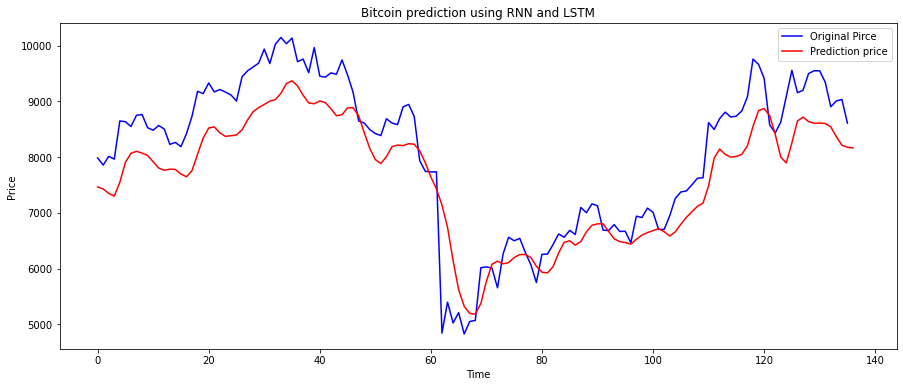

In [27]:
plt.figure(figsize=(15,6))
plt.plot(Y_test, color = 'blue', label = 'Original Pirce')
plt.plot(Y_pred, color = 'red', label = 'Prediction price')
plt.title('Bitcoin prediction using RNN and LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()